# Demo outlier detection with Clustering-Based (DBSCAN and KMeans)

Trần Tuấn Huy - 20424037

In [12]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import DBSCAN, KMeans
import pandas as pd
from collections import Counter
from scipy.spatial.distance import cdist

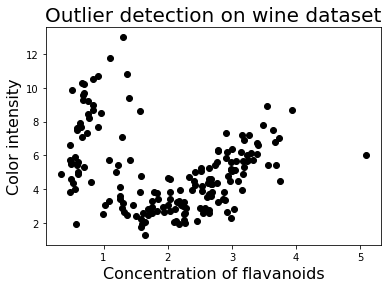

,0,1
0,3.06,5.64
1,2.76,4.38
2,3.24,5.68
3,3.49,7.80
4,2.69,4.32
...,...,...
173,0.61,7.70
174,0.75,7.30
175,0.69,10.20
176,0.68,9.30


In [13]:
# Import dataset
X = np.genfromtxt('./datasets/wine-data.csv', delimiter=',') # The wine dataset of scikit-learn
data = X
feature_space = pd.DataFrame(data)

# Visual dataset
plt.scatter(X[:, 0], X[:, 1], color='black', marker='o')
plt.xlabel('Concentration of flavanoids', fontsize=16)
plt.ylabel('Color intensity', fontsize=16)
plt.title("Outlier detection on wine dataset", fontsize=20)
plt.show()
feature_space

In [ ]:
# Train DBSCAN model with parameters and data
model = DBSCAN(eps=1, min_samples=10).fit(data)

In [14]:
# Find outlier with no label
outlier_df = pd.DataFrame(data)
print(Counter(model.labels_))
print(outlier_df[model.labels_ == -1])

Counter({0: 147, 1: 25, -1: 6})
        0      1
18   3.93   8.70
49   3.54   8.90
121  5.08   6.00
151  1.36  10.80
158  1.31  13.00
159  1.10  11.75


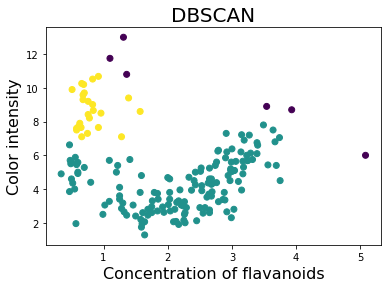

In [15]:
colors = model.labels_
plt.scatter(data[:,0], data[:,1], c=colors, marker='o')
plt.xlabel('Concentration of flavanoids', fontsize=16)
plt.ylabel('Color intensity', fontsize=16)
plt.title('DBSCAN', fontsize=20)
plt.show()

In [17]:
# Train K-means model with parameters and data
km = KMeans(n_clusters=5)
clusters=km.fit_predict(data)

centroids = km.cluster_centers_
points = np.empty((0,len(data[0])), float)
distances_ratio = np.empty((0,len(data[0])), float)

for i, center_elem in enumerate(centroids):
    data_i = data[clusters == i]
    d = cdist([center_elem], data_i, 'euclidean') # calculate the distance between center and other points
    d_ratio = np.divide(d,np.mean(d)) # calculate distance ratio with mean
    
    distances_ratio = np.append(distances_ratio, d) 
    points = np.append(points, data_i, axis=0)

In [18]:
threshold = 1.6
# getting outliers whose distances_ratio > threshold
outliers = points[np.where(distances_ratio > threshold)]
pd.DataFrame(outliers)

,0,1
0,0.65,7.65
1,1.36,10.80
2,0.58,7.60
3,0.58,7.50
4,1.31,13.00
5,1.10,11.75
6,0.92,7.65
7,3.93,8.70
8,3.54,8.90
9,5.08,6.00


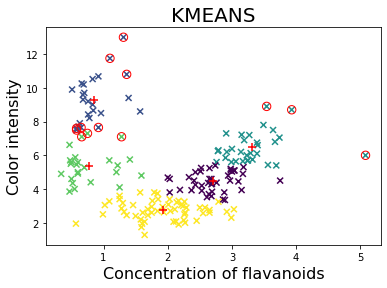

In [19]:
plt.xlabel('Concentration of flavanoids', fontsize=16)
plt.ylabel('Color intensity', fontsize=16)
plt.title('KMEANS', fontsize=20)
# plotting initial data
plt.scatter(*zip(*data),c=clusters,marker = "x") 
# plotting red ovals around outlier points
plt.scatter(*zip(*outliers),marker="o",facecolor="None",edgecolor="r",s=70)
# plotting centers as blue dots
plt.scatter(*zip(*centroids),marker="+",facecolor="red",s=50)
plt.show()